# Sinha / Saha exploration

> From 4:28 mark of [New Recipe for Pi - Numberphile](https://youtu.be/nXexsSWrc1Q?t=268s)

He also discusses values for lambda (λ) at 605s (10:05).

`SinhaSaha:=(N, lambda) = 4+sum(1/k!*(1/(k+lambda)-4/(2*k+1))*pochhammer((2*k+1)^2/4/(k+lambda)-k, k-1), k=1..N);`


> Snippet from the appendix in the paper published by Sinha / Saha

![Appendix snippet](./snippet.svg)


In [1]:
import logging
import sys

import numpy as np
import scipy as sp
import sympy as sym
from latex_utils import set_display_level, sym_display_latex

set_display_level(logging.INFO)

sym.init_printing()


MILLION = 1_000_000
sys.set_int_max_str_digits(MILLION)


def mprint(msg: str, basic: sym.Basic | str | None = None, prec: int | None = None) -> None:
    if prec is not None:
        print(msg, end=' ')
        basic_str = str(basic) if type(basic) != str else basic
        prec = len(basic_str) if prec == -1 else prec
        print(f'>>{basic_str[:prec]}<<', end='')
        print(f'{basic_str[prec:]}')
    else:
        print(msg)
        if basic is not None:
            sym_display_latex('', basic)

> Load control file for 1 million pi digits (pi_1000000.txt) to validate how we are using sympy.pi

In [3]:
# read control file for 1_000_000 digits of pi

from pi_1000000 import read_pi_control

control_pi = read_pi_control('../etc/pi_1000000.txt', MILLION)


def first_index_not_matched(s1: str, s2: str) -> int:
    for i, (c, p) in enumerate(zip(s1, s2)):
        if c != p:
            return i
    return -1

In [4]:
PREC = MILLION

DEBUG_PI = True

if DEBUG_PI:
    prec_pi = sym.pi.evalf(PREC)
    prec_control_pi = control_pi.evalf(PREC)

    accuracy = (prec_control_pi - prec_pi).evalf(PREC/2)
    digits: int = int(sym.Abs(sym.floor(sym.log(accuracy) / sym.log(10))))

    digits_match_until = first_index_not_matched(str(prec_control_pi), str(prec_pi))
    all_digits_matched = digits_match_until == -1

    # subtract 1 from len for decimal point ('.')
    mprint(f'len control_pi: {len(str(prec_control_pi))-1:_}')
    mprint(f'len pi: {len(str(prec_pi))-1:_}')

    mprint(f'do all digits match? {all_digits_matched}')
    mprint(f'{digits_match_until=:_}')

    # mprint('control_pi:\t', str(prec_control_pi), digits)
    # mprint('pi:\t\t', str(prec_pi), digits)

    # mprint('control_pi - pi:', accuracy)

    mprint(f'\n{digits} digits accuracy')

len control_pi: 1_000_000
len pi: 1_000_000
do all digits match? True
digits_match_until=-1

1000000 digits accuracy


## sympy representation of SinhaSaha

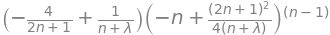

In [5]:
n = sym.symbols('n', integer=True, positive=True)
λ, π = sym.symbols('λ π', real=True)
SinhaSaha = sym.symbols('SinhaSaha', cls=sym.Function)

sum_left_no_factorial = 1 / (n+λ) - 4 / (2*n + 1)
sum_right = (2*n + 1)**2 / (4 * (n + λ)).factor() - n

sum_inner = sum_left_no_factorial * sym.RisingFactorial(sum_right, n-1)
sum_inner

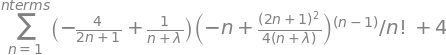

In [6]:
nterms = sym.symbols('nterms', integer=True, positive=True)
# nterms = sym.oo
# nterms = sym.Integer(400)
# nterms = sym.Integer(PREC)

# def reciprocal_factorial(n: int):
#     return 1 / cf.cached_factorial(n)

SinhaSaha = 4 + sym.Sum((1 / sym.factorial(n)) * sum_inner, (n, 1, nterms))
SinhaSaha

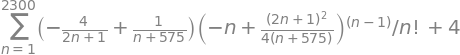

In [75]:
N = 2300
λ_val = 575
prec = 510

SinhaSaha_subs = SinhaSaha.subs({λ: λ_val, nterms: N})
SinhaSaha_subs

In [43]:
# SinhaSaha_complete = sym.Eq(π, SinhaSaha_subs)
# SinhaSaha_complete

In [76]:
SinhaSaha_prec = SinhaSaha_subs.evalf(prec)
SinhaSaha_prec

In [79]:
mprint(f'{N=}')
mprint(f'{λ_val=}')
mprint(f'{prec=}')
print()

pi = sym.pi.evalf(prec)
accuracy = (SinhaSaha_prec - pi).evalf(prec)
# print(SinhaSaha_prec)
# print(pi)
# print(accuracy)

digits: int = int(sym.Abs(sym.floor(sym.log(accuracy) / sym.log(10)))) + 1
# digits = prec

mprint('control_pi:\t', str(control_pi.evalf(prec)), digits)
mprint('pi:\t\t', str(pi), digits)

mprint('SinhaSaha:\t', str(SinhaSaha_prec), digits)

mprint('\nSinhaSaha - pi:', accuracy)

mprint(f'\n{digits} digits accuracy')

N=2300
λ_val=575
prec=510

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367363
control_pi:	 >>3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105